In [ ]:
import keras
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


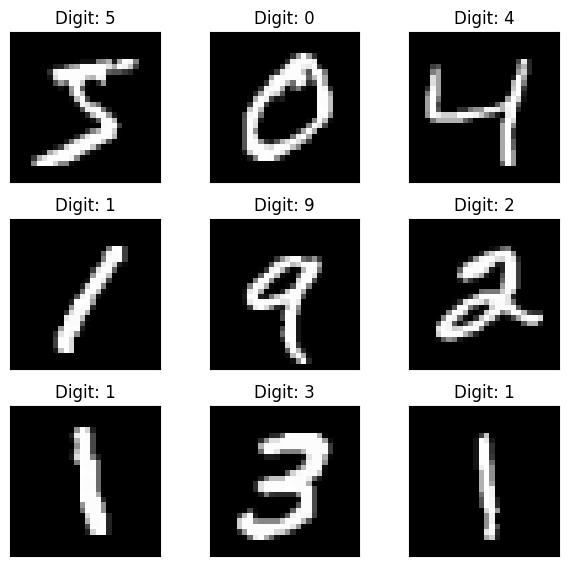

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows = 28
img_cols = 28
import keras.backend as k
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


In [ ]:
import keras
#set number of categories
num_category = 10
# convert class vectorsto binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential()
# Convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# 32 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# 64 convolution filters used each of size 3x3
# Choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# Randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# Flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# Fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# One more dropout for convergence' sake
model.add(Dropout(0.5))
# Output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
# Categorical ce since we have multiple classes (10)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [ ]:
batch_size = 128
num_epoch = 10
# Model training
model_log = model.fit(X_train, y_train,
                      batch_size=batch_size,
                      epochs=num_epoch,
                      verbose=1,
                      validation_data=(X_test, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 169s 357ms/step - accuracy: 0.1096 - loss: 2.3013 - val_accuracy: 0.3411 - val_loss: 2.2608
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 335ms/step - accuracy: 0.2257 - loss: 2.2534 - val_accuracy: 0.5031 - val_loss: 2.1965
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 334ms/step - accuracy: 0.3241 - loss: 2.1914 - val_accuracy: 0.5554 - val_loss: 2.1090
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 336ms/step - accuracy: 0.4052 - loss: 2.1037 - val_accuracy: 0.6064 - val_loss: 1.9876
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 162s 345ms/step - accuracy: 0.4704 - loss: 1.9876 - val_accuracy: 0.6638 - val_loss: 1.8267
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 340ms/step - accuracy: 0.5198 - loss: 1.8401 - val_accuracy: 0.7164 - val_loss: 1.6303
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 156s 334ms/step - accuracy: 0.5677 - loss: 1.6596 - val_accuracy: 0.7589 - val_loss: 1.4159
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 333ms/step - accuracy: 0.6016 -

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904


Test loss: 0.9190545678138733
Test accuracy: 0.8097000122070312


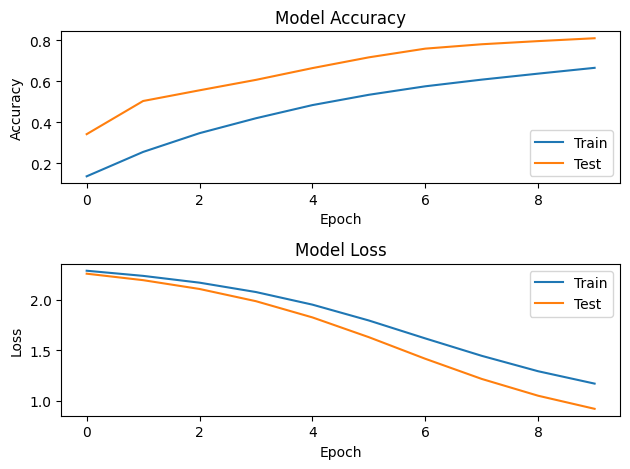

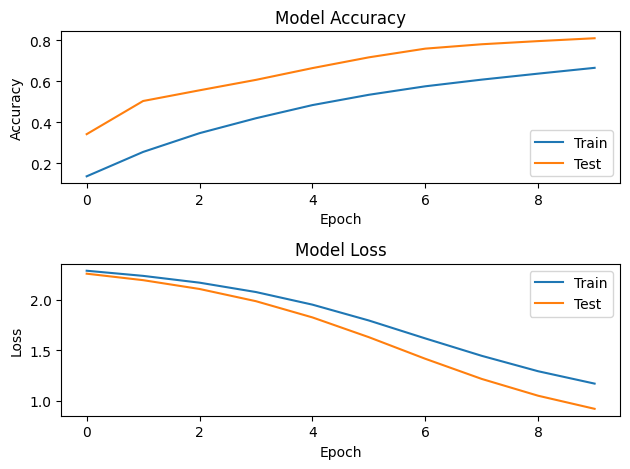

In [ ]:
import os

# Plotting the metrics
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout()
fig


In [ ]:
# Save the model
# Serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)

# Serialize weights to HDF5
model.save_weights("model_digit.weights.h5")
print("Saved model to disk")


Saved model to disk
